<a href="https://colab.research.google.com/github/bk320/BubbleShot/blob/main/Copia_de_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importacion de todas las librerias necesarias para el preprocesamiento del dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

RECOPILACION DE DATOS

In [ ]:
# Lo primero que hacemos es recopilar los datos necesarios para los modelos.

url = 'https://raw.githubusercontent.com/Jesux28/Practica-ML-/master/dataset_diabetes_data.csv'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv(url)

# Codificamos las cabeceras del dataset

df.columns = df.columns.str.lower().str.replace(" ","_", regex=True)
df.columns = df.columns.str.replace(".","_", regex=True)
df.columns = df.columns.str.replace("-","_", regex=True)
df.columns = df.columns.str.replace(":","_", regex=True)

df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


ENTENDIENDO LOS DATOS

●	encounter_id: identificador único para cada visita de un paciente al hospital.

●	patient_nbr: identificador único para cada paciente.

●	race: raza del paciente.

●	gender : género del paciente.

●	age : edad del paciente.

●	weight : peso del paciente.

●	admission_type_id : tipo de admisión del paciente.

●	discharge_disposition_id : tipo de alta del paciente.

●	admission_source_id : fuente de admisión del paciente.

●	time_in_hospital : tiempo en el hospital (número de días).

●	payer_code : código del pagador (seguro médico).

●	medical_specialty : especialidad médica del médico que trató al paciente.

●	num_lab_procedures : número de procedimientos de laboratorio realizados durante la visita.

●	num_procedures : número de procedimientos médicos realizados durante la 
visita.

●	num_medications : número de medicamentos prescritos durante la visita.

●	number_outpatient : número de visitas ambulatorias realizadas por el paciente en los últimos 12 meses.

●	number_emergency : número de visitas de emergencia realizadas por el paciente en los últimos 12 meses.

●	number_inpatient : número de hospitalizaciones realizadas por el paciente en los últimos 12 meses.

●	diag_1 : código de diagnóstico principal.

●	diag_2 : código de diagnóstico secundario.

●	diag_3 : código de diagnóstico terciario.

●	number_diagnoses : número total de diagnósticos durante la visita.

●	max_glu_serum : resultado del nivel máximo de glucosa en sangre.

●	A1Cresult : resultado del examen de hemoglobina A1c.

●	metformin : medicamento para la diabetes - metformina.

●	repaglinide : medicamento para la diabetes - repaglinida.

●	nateglinide : medicamento para la diabetes - nateglinida.

●	chlorpropamide : medicamento para la diabetes - clorpropamida.

●	glimepiride : medicamento para la diabetes - glimepirida.

●	acetohexamide : medicamento para la diabetes - acetohexamida.

●	glipizide : medicamento para la diabetes - glipizida.

●	glyburide : medicamento para la diabetes - gliburida.

●	tolbutamide : medicamento para la diabetes - tolbutamida.

●	pioglitazone : medicamento para la diabetes - pioglitazona.

●	rosiglitazone: medicamento para la diabetes - rosiglitazona.

●	acarbose: medicamento para la diabetes - acarbosa.

●	miglitol: medicamento para la diabetes - miglitol.

●	troglitazone: medicamento para la diabetes - troglitazona.

●	tolazamide: medicamento para la diabetes - tolazamida.

●	examide: medicamento para la diabetes - examida.

●	citoglipton : medicamento para la diabetes - citogliptona.

●	 insulin : medicamento para la diabetes - insulina.

●	 glyburide-metformin : medicamento para la diabetes - combinación de gliburida y metformina.

●	 glipizide-metformin : medicamento para la diabetes - combinación de glipizida

●	pioglitazone: Es un medicamento utilizado para tratar la diabetes tipo 2, ya que ayuda a reducir la resistencia a la insulina.

●	change: Indica si se realizó un cambio en la medicación del paciente durante su estancia en el hospital.

●	diabetesMed: Indica si el paciente recibe medicamentos para la diabetes durante su estancia en el hospital.

●	readmitted: Indica si el paciente fue readmitido en el hospital en menos de 30 días después del alta.


LIMPIEZA DE LOS DATOS

In [ ]:
# Verificamos la informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              17999 non-null  int64 
 1   patient_nbr               17999 non-null  int64 
 2   race                      17999 non-null  object
 3   gender                    17999 non-null  object
 4   age                       17999 non-null  object
 5   weight                    17999 non-null  object
 6   admission_type_id         17999 non-null  int64 
 7   discharge_disposition_id  17999 non-null  int64 
 8   admission_source_id       17999 non-null  int64 
 9   time_in_hospital          17999 non-null  int64 
 10  payer_code                17999 non-null  object
 11  medical_specialty         17999 non-null  object
 12  num_lab_procedures        17999 non-null  int64 
 13  num_procedures            17999 non-null  int64 
 14  num_medications       

In [ ]:
# Revisamos los valores faltantes en el dataset
# Determinamos que en el data set los valores faltantes tienen el simbolo '?' puesto.

for col in df.columns:
  conteo = df[col][df[col] == '?'].count()
  porcentaje = round(conteo * 100 / df.shape[0], 2)
  print(col, conteo, "-> ", porcentaje, "%")

encounter_id 0 ->  0.0 %
patient_nbr 0 ->  0.0 %
race 301 ->  1.67 %
gender 0 ->  0.0 %
age 0 ->  0.0 %
weight 17429 ->  96.83 %
admission_type_id 0 ->  0.0 %
discharge_disposition_id 0 ->  0.0 %
admission_source_id 0 ->  0.0 %
time_in_hospital 0 ->  0.0 %
payer_code 17999 ->  100.0 %
medical_specialty 7127 ->  39.6 %
num_lab_procedures 0 ->  0.0 %
num_procedures 0 ->  0.0 %
num_medications 0 ->  0.0 %
number_outpatient 0 ->  0.0 %
number_emergency 0 ->  0.0 %
number_inpatient 0 ->  0.0 %
diag_1 7 ->  0.04 %
diag_2 106 ->  0.59 %
diag_3 509 ->  2.83 %
number_diagnoses 0 ->  0.0 %
max_glu_serum 0 ->  0.0 %
a1cresult 0 ->  0.0 %
metformin 0 ->  0.0 %
repaglinide 0 ->  0.0 %
nateglinide 0 ->  0.0 %
chlorpropamide 0 ->  0.0 %
glimepiride 0 ->  0.0 %
acetohexamide 0 ->  0.0 %
glipizide 0 ->  0.0 %
glyburide 0 ->  0.0 %
tolbutamide 0 ->  0.0 %
pioglitazone 0 ->  0.0 %
rosiglitazone 0 ->  0.0 %
acarbose 0 ->  0.0 %
miglitol 0 ->  0.0 %
troglitazone 0 ->  0.0 %
tolazamide 0 ->  0.0 %
examide 0

In [ ]:
# Viendo el porcentaje de datos faltantes de las columnas decidimos eliminar 3 columnas
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

EDA

In [ ]:
# Funcion para mostrar los porcentajes asi como tambien una grafica de la distribucion de los datos en una columna
def distribucion(columna):
  values = df[columna].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  print(values)

  sns.countplot(x = columna, data = df)
  plt.title("Distribucion de los valores")
  plt.show()

In [ ]:
# Funcion para mostrar la relacion entre una columna con el target
def relacionConTarget(columna):
  sns.countplot(x = columna, hue = "readmitted", data = df)
  plt.title(columna + ' - Readmitted')
  plt.show()

In [ ]:
# Funcion para mostrar las probabilidades de ser readmitidos
def probabilidadConTarget(columna):
  g = sns.catplot(x = columna,y = 'readmitted', data = df, kind = "bar", height= 5)
  g.set_ylabels("Probabilidad de readmision")
  plt.show()

NO     52.24%
>30    36.46%
<30     11.3%
Name: readmitted, dtype: object


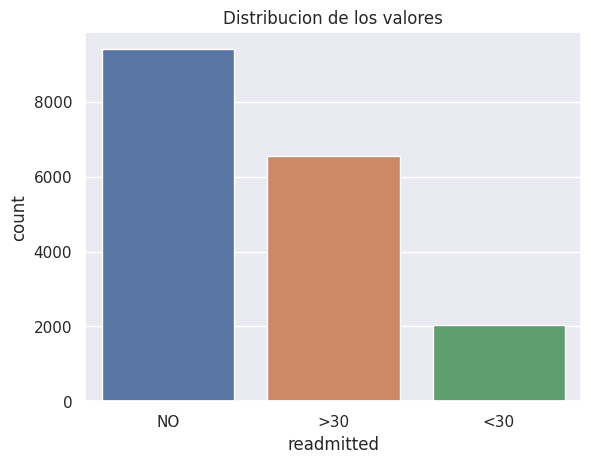

In [ ]:
# Considerando la descripcion del data set intuimos que el target o y en este dataset es la columna readmitted
# Para dicha columna la observamos los valores que puede tener.

distribucion('readmitted')

0    88.7%
1    11.3%
Name: readmitted, dtype: object


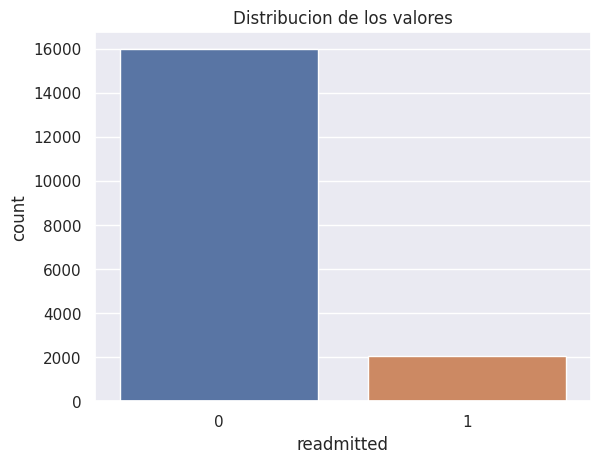

In [ ]:
# Como podemos ver, son datos categoricos con 3 etiquetas, No, >30 y <30
# Tomando en cuenta la descripcion del dataset y lo que realmente creemos que se busca determinar en la columna readmitted
# Realizaremos el siguiente mapeo a la columna readmitted: No = 0, >30 = 0 y <30 = 1
df = df.replace({"NO":0, "<30":1, ">30":0})
distribucion('readmitted')

Caucasian          73.03%
AfricanAmerican    21.39%
Hispanic            2.06%
?                   1.67%
Other               1.49%
Asian               0.36%
Name: race, dtype: object


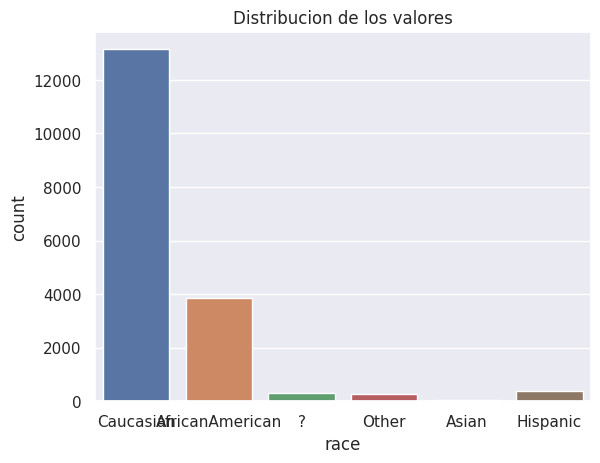

In [ ]:
# Analisis de race
distribucion('race')

0    73.03%
1    21.39%
2     5.58%
Name: race, dtype: object


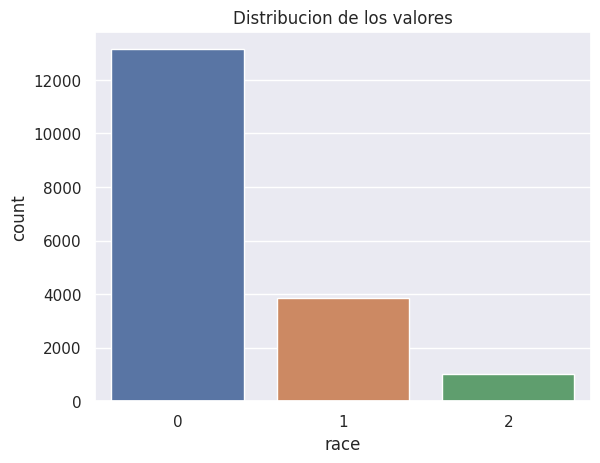

In [ ]:
# En este caso observamos que hay datos faltantes, y que tambien tenemos 3 categorias
# cuya cantidad de ocurrencias es muy baja, asi que decidimos agrupar estas cuatro en la categoria other
df.race = df.race.replace({"Caucasian":0,"AfricanAmerican":1,"Asian":2,"Hispanic":2, "?":2, "Other":2})
distribucion('race')

Female    53.3%
Male      46.7%
Name: gender, dtype: object


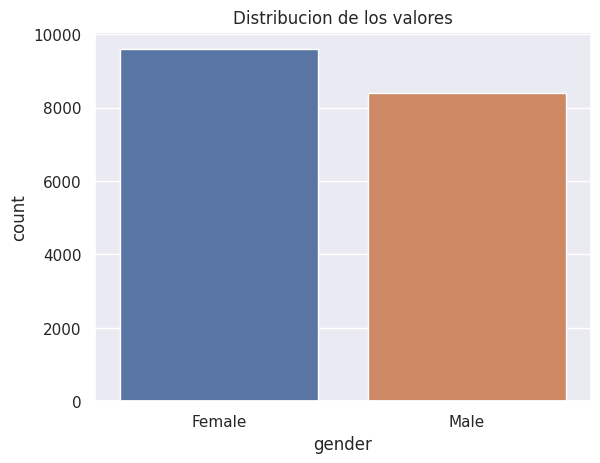

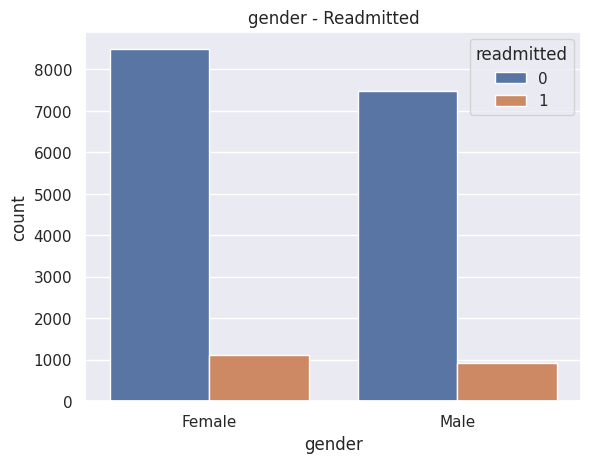

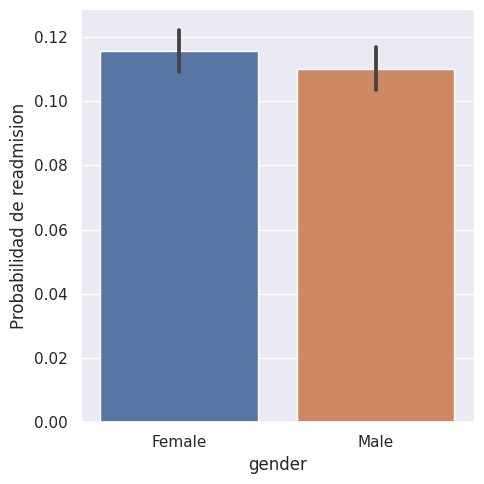

In [ ]:
# Analisis de gender
distribucion('gender')
relacionConTarget('gender')
probabilidadConTarget('gender')

0    53.3%
1    46.7%
Name: gender, dtype: object


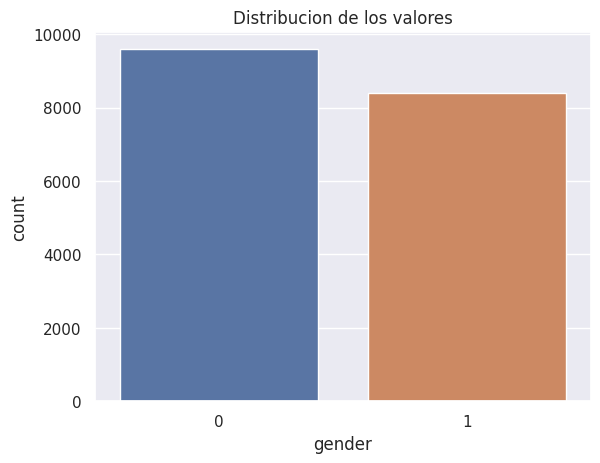

In [ ]:
# En este caso unicamente realizaremos un mapeo
df.gender = df.gender.replace({"Female":0,"Male":1})
distribucion('gender')

[70-80)     26.53%
[60-70)     21.65%
[50-60)     18.03%
[80-90)     12.68%
[40-50)     10.88%
[30-40)      4.51%
[90-100)     1.78%
[20-30)      1.72%
[10-20)      1.66%
[0-10)       0.56%
Name: age, dtype: object


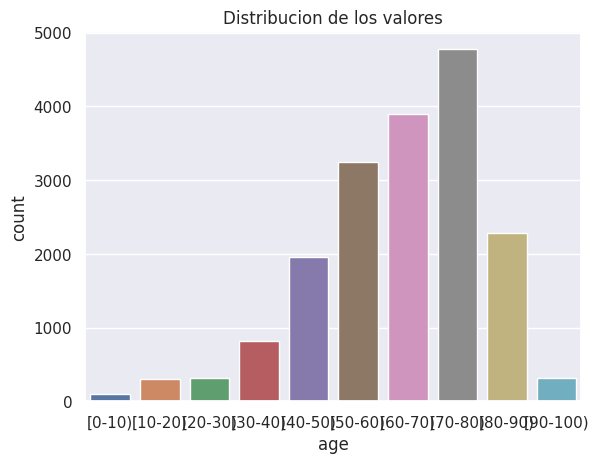

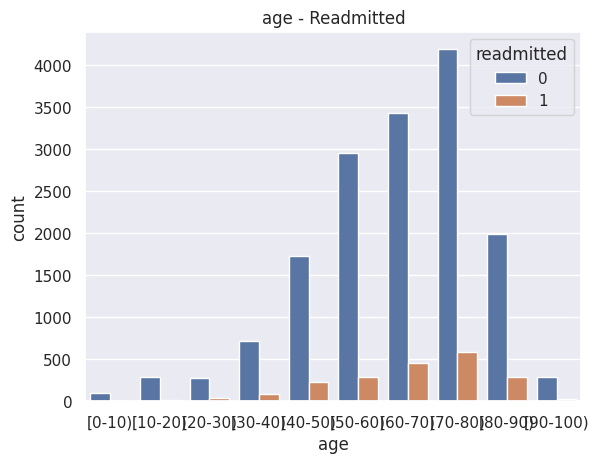

In [ ]:
# Analisis de age
distribucion('age')
relacionConTarget('age')

In [ ]:
# Para esta columna, desidimos realizar el mapeo haci el promedio de edad de cada etiqueta
df.age = df.age.replace({'[0-10)':5,'[10-20)':15,'[20-30)':25,'[30-40)':35,'[40-50)':45,'[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,'[90-100)':95})

1    49.27%
2    16.13%
3    15.57%
6    11.88%
5     6.93%
8     0.19%
4     0.02%
Name: admission_type_id, dtype: object


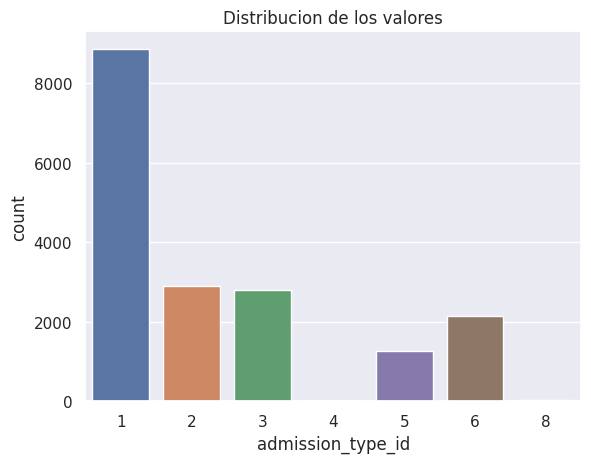

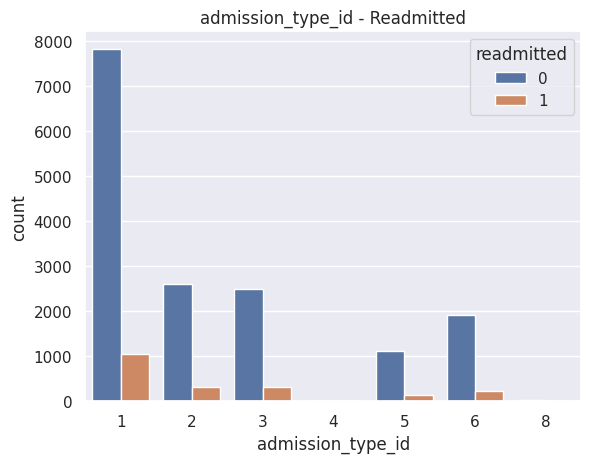

In [ ]:
distribucion('admission_type_id')
relacionConTarget('admission_type_id')

En este caso aveiguando el significado de cada uno de los valores obtuvimos que:

  1: Emergencia,
  2: Urgencia,
  3: Electiva,
  4: Recien nacido,
  5: Trauma,
  9: Informacion no disponible,

Y en consecuencai decidimos agrupar las categorias 1 y 2, y mover todos los que no tienen un valor valido a al id 9.

1     65.4%
3    15.57%
9    12.07%
5     6.93%
4     0.02%
Name: admission_type_id, dtype: object


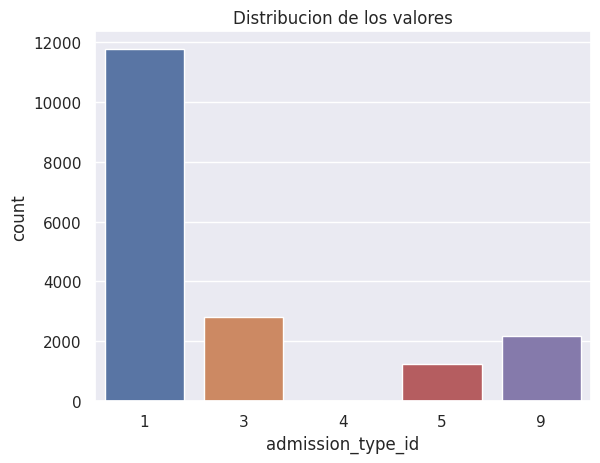

In [ ]:
df.admission_type_id = df.admission_type_id.replace({2:1,6:9,8:9})
distribucion('admission_type_id')

1      52.0%
18    18.82%
6      9.44%
3      8.28%
5      3.46%
25     3.22%
2      1.62%
11      1.6%
7      0.49%
4      0.47%
14     0.23%
8      0.13%
22     0.07%
13     0.04%
10     0.03%
17     0.03%
12     0.01%
16     0.01%
23     0.01%
9      0.01%
Name: discharge_disposition_id, dtype: object


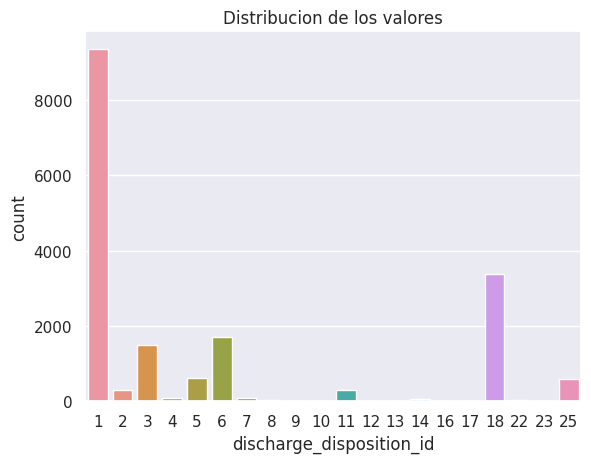

In [ ]:
# Anilisis de discharge_disposition_id
distribucion('discharge_disposition_id')

En este caso podemos ver demasiados valores. Para solucionar esa situación, tomando en consideracion el significado de los codigos que se muestran en la siguiente tabla obtenida de la pagina de la NUBC de Estados Unidos:
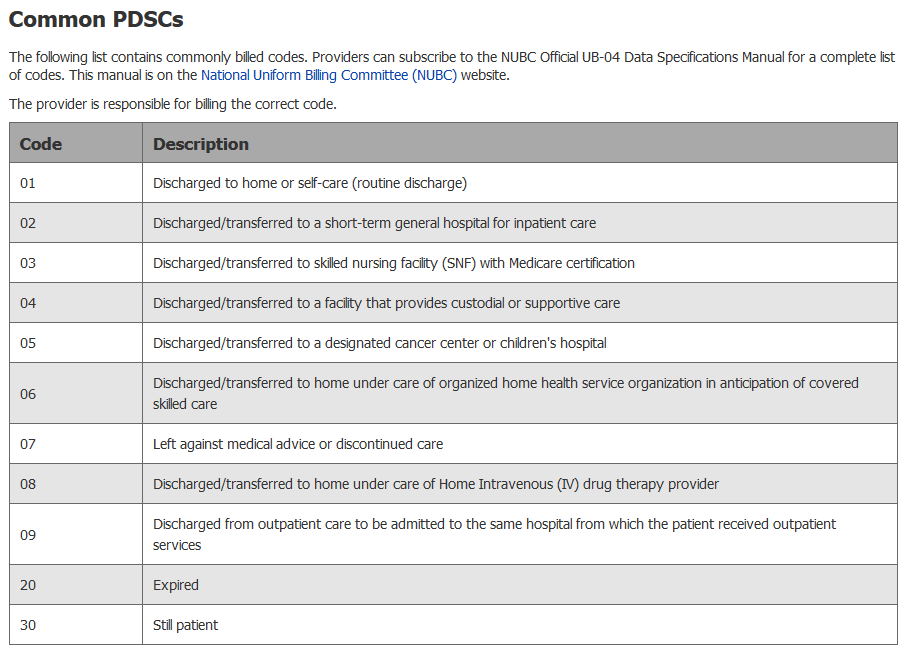

Aplicaremos las siguientes reglas: 

1.- Si alguno incluye la palabra "hogar", se agruparan con un valor de 0

2.- Cualquier otro valor sera agrupado en el valor 1

0    61.58%
1    38.42%
Name: discharge_disposition_id, dtype: object


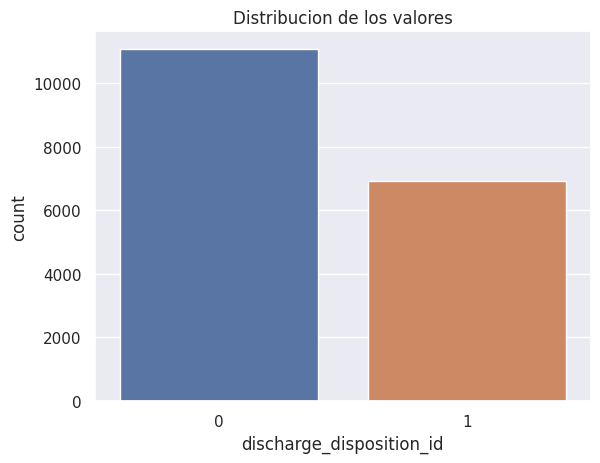

In [ ]:
# Mapeado de discharge_disposition_id
df.discharge_disposition_id = df.discharge_disposition_id.replace({1:0,6:0,8:0})
df.discharge_disposition_id = df.discharge_disposition_id.replace({2:1,3:1,4:1,5:1,7:1,9:1,10:1,11:1,12:1,13:1,14:1,16:1,17:1,18:1,22:1,23:1,25:1})
distribucion('discharge_disposition_id')

7     50.38%
1     22.31%
17    14.34%
4      6.52%
2      3.56%
5      0.98%
20     0.89%
3      0.65%
6      0.36%
8      0.02%
Name: admission_source_id, dtype: object


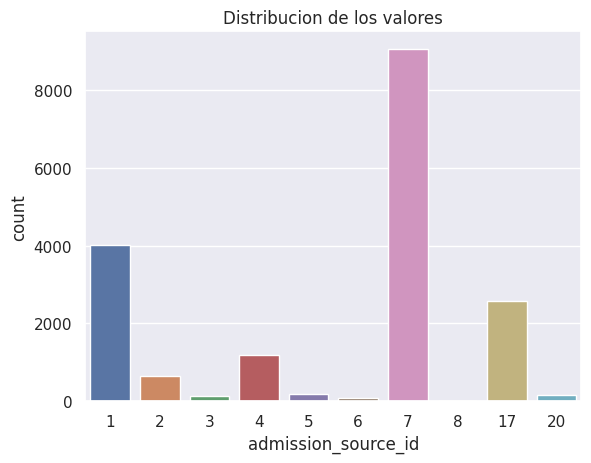

In [ ]:
# Analisis de admission_source_id
distribucion('admission_source_id')

2    50.38%
0    26.52%
1     23.1%
Name: admission_source_id, dtype: object


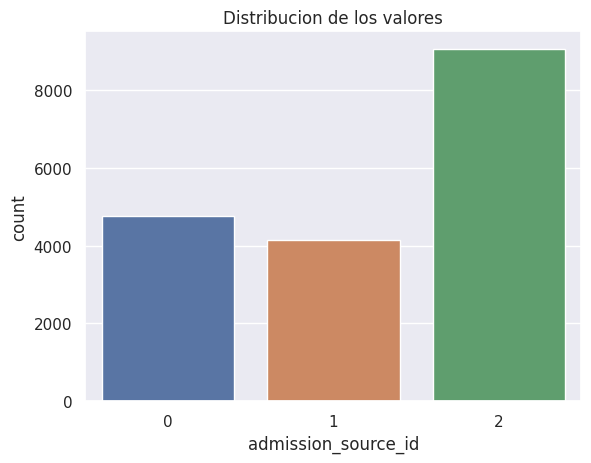

In [ ]:
# Vemos que es un caso muy similar al de la columna anterior por tanto,
# Tomando en cuenda el significado de los codigos que se describen en esta pagina:
# https://resdac.org/cms-data/variables/source-admission-inpatient-facility-newborn-admit-type-delivery-code
# Realizamos el siguiente mapeo
df.admission_source_id = df.admission_source_id.replace({1:"Referral",2:"Referral",3:"Referral",
                                                         4:"Other",5:"Other",6:"Other",8:"Other",17:"Other",20:"Other",
                                                         7:"Emergency"})
df.admission_source_id = df.admission_source_id.replace({'Referral':0,'Other':1,'Emergency':2})
# Quedando la distribucion de la siguiente manera
distribucion('admission_source_id')

In [ ]:
# Desde la columna time_in_hospital hasta la columna number_inpatient, no se identifico la necesidad de realizar ningun cambio.
# Por que identificamos que los datos en estas columnas son mediciones crudas de cuantas veces se dio un suceso.
df[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient']].head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient
0,1,41,0,1,0,0,0
1,3,59,0,18,0,0,0
2,2,11,5,13,2,0,1
3,2,44,1,16,0,0,0
4,1,51,0,8,0,0,0


In [ ]:
# Analisis de diag_1, diag_2, diag_3
# distribucion('diag_1') No mostramos las distrubuciones por que la cantidad de valores diferentes es muy grande
df[['diag_1','diag_2','diag_3']].head(10)

,diag_1,diag_2,diag_3
0,250.83,?,?
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486


In [ ]:
# Antes de realizar un mapeo, recordemos que estas columnas tienen datos faltantes
for col in ['diag_1','diag_2','diag_3']:
  conteo = df[col][df[col] == '?'].count()
  porcentaje = round(conteo * 100 / df.shape[0], 2)
  print(col, conteo, "-> ", porcentaje, "%")

diag_1 7 ->  0.04 %
diag_2 106 ->  0.59 %
diag_3 509 ->  2.83 %


In [ ]:
# Para los cuales manejamos dos opciones, que son la de eliminarlos o reemplazarlos con la moda.
# Decidimos usar la moda para completar los datos faltantes
# El valor mas comun en diag_1 es 414, en diag_2 es 250 y en diag_3 es 250 
df.diag_1 = df.diag_1.replace({'?':414})
df.diag_2 = df.diag_2.replace({'?':250})
df.diag_3 = df.diag_3.replace({'?':250})
for col in ['diag_1','diag_2','diag_3']:
  conteo = df[col][df[col] == '?'].count()
  porcentaje = round(conteo * 100 / df.shape[0], 2)
  print(col, conteo, "-> ", porcentaje, "%")

diag_1 0 ->  0.0 %
diag_2 0 ->  0.0 %
diag_3 0 ->  0.0 %


In [ ]:
# Creamos una funcion para realizar del mapeo de las 3 columnas diag, el mapeo se lo realiza teniendo como referencia
# https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD9-CM/2008/
def mapeoDiagnosticos(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = 0 # "Otros"
        data[col] = data[col].astype(np.float16)
    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = 1 #"Circulatorio"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = 2 #"Respiratorio"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = 3 #"Digestivo"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = 4 #"Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = 5 #"Lesiones"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = 6 #"Musculoesquelético"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = 7 #"Genitourinario."
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = 8 #"Neoplasias"
        data["temp_diag"] = data["temp_diag"].fillna(0) #"Otros"

        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

1.0    35.08%
0.0    16.37%
2.0    12.52%
4.0     9.57%
3.0     8.34%
5.0     6.27%
6.0     4.52%
7.0     3.81%
8.0     3.52%
Name: diag_1, dtype: object


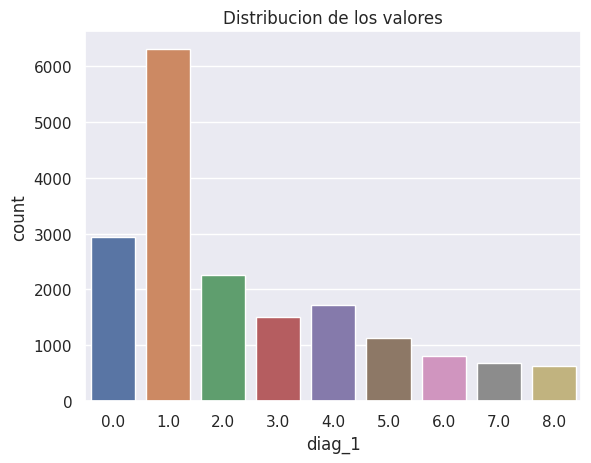

1.0    33.29%
0.0    23.03%
4.0    18.48%
2.0     9.47%
7.0     5.84%
3.0     3.87%
8.0     2.38%
5.0     2.27%
6.0     1.36%
Name: diag_2, dtype: object


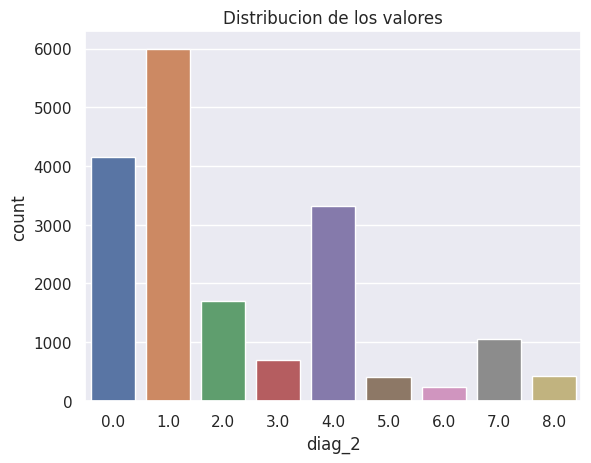

1.0     30.2%
0.0    26.28%
4.0    22.98%
2.0     6.73%
7.0     5.08%
3.0     3.86%
5.0     1.69%
6.0     1.69%
8.0     1.47%
Name: diag_3, dtype: object


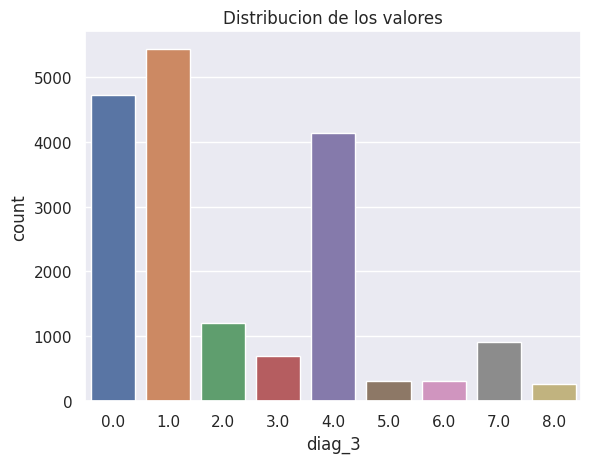

In [ ]:
# Relizamos el mapeo de diag_1, diag_2, diag_3
df = mapeoDiagnosticos(df, ["diag_1","diag_2","diag_3"])
distribucion('diag_1')
distribucion('diag_2')
distribucion('diag_3')

9    29.41%
8    15.01%
7     14.2%
6    13.17%
5    12.13%
4     8.42%
3     4.86%
2     2.23%
1     0.58%
Name: number_diagnoses, dtype: object


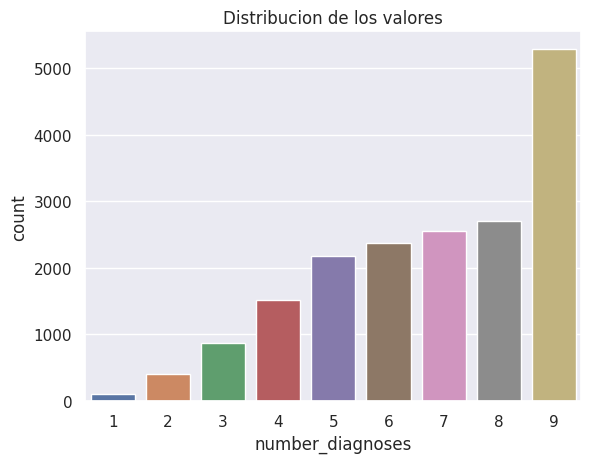

In [ ]:
# Analisis number_diagnoses
distribucion('number_diagnoses')

None    90.04%
Norm     4.73%
>200     2.91%
>300     2.33%
Name: max_glu_serum, dtype: object


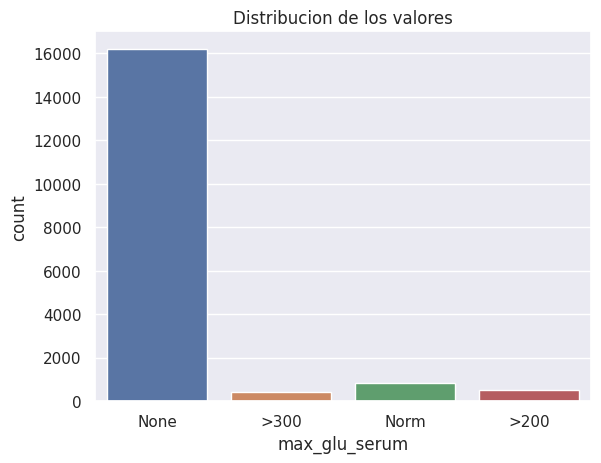

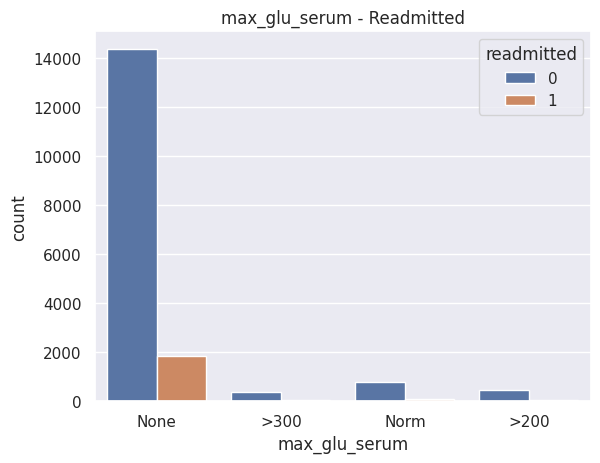

In [ ]:
# Analisis de max_glu_serum 
distribucion('max_glu_serum')
relacionConTarget('max_glu_serum')

0    90.04%
2     5.23%
1     4.73%
Name: max_glu_serum, dtype: object


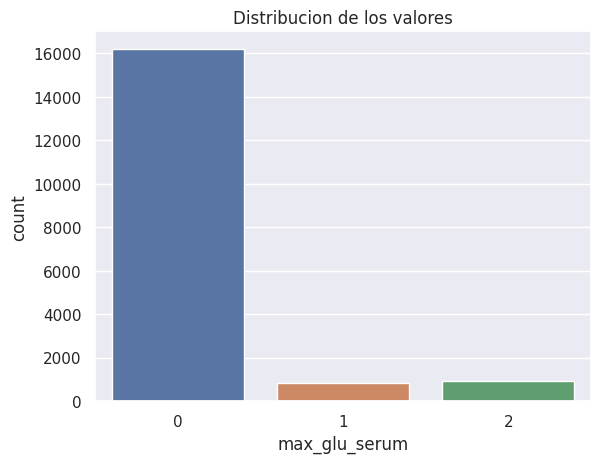

In [ ]:
# En este caso realizaremos un mapeo, agrupando >300 y >200 por que ambos denotan los mismo
# es decir un nivel maximo alto de glucosa en sangre:
df.max_glu_serum = df.max_glu_serum.replace({'None':0,'Norm':1,'>200':2,'>300':2})
distribucion('max_glu_serum')

None    81.41%
>8       11.6%
>7       3.55%
Norm     3.44%
Name: a1cresult, dtype: object


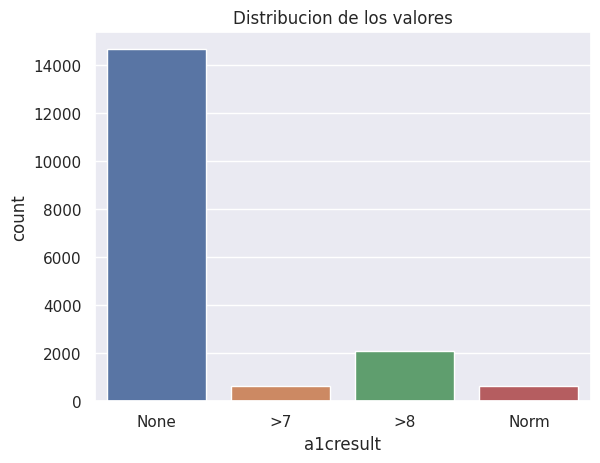

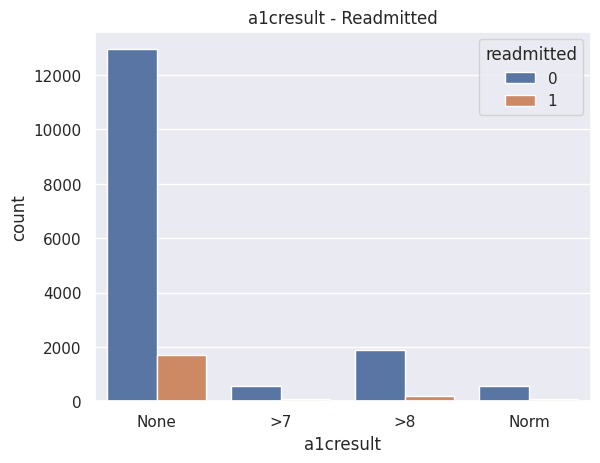

In [ ]:
# Analisis de a1cresult
distribucion('a1cresult')
relacionConTarget('a1cresult')

0    81.41%
2    15.15%
1     3.44%
Name: a1cresult, dtype: object


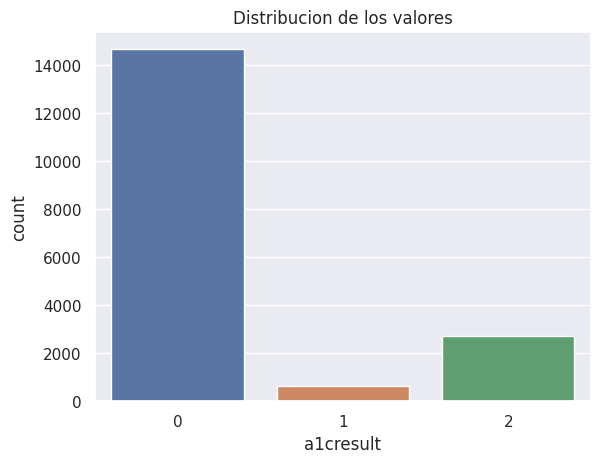

In [ ]:
# En este caso el mapeo se lo realizara considerando que cualquier valor por encima de 6.5% es un indicativo de diabetes
# por lo tanto >7 y >8 quedaran dentro de una misma categoria:
df.a1cresult = df.a1cresult.replace({'None':0,'Norm':1,'>7':2,'>8':2})
distribucion('a1cresult')

No        82.87%
Steady    15.26%
Up         1.28%
Down       0.58%
Name: metformin, dtype: object


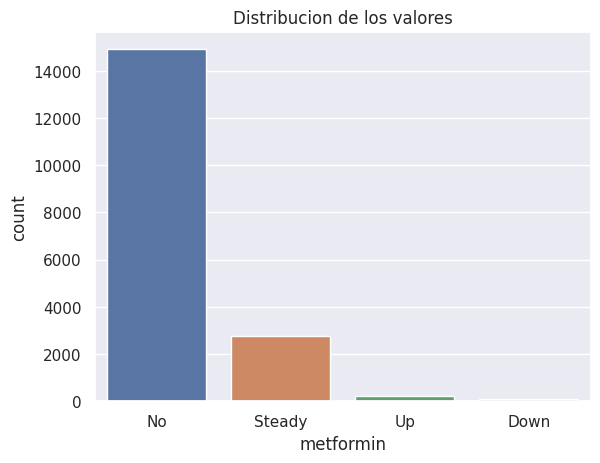

In [ ]:
# Analisis de los medicamentos para la diabetes
columnas = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide_metformin', 'glipizide_metformin', 
             'glimepiride_pioglitazone', 'metformin_rosiglitazone','metformin_pioglitazone']

distribucion('metformin')

0    82.87%
2    15.26%
3     1.28%
1     0.58%
Name: metformin, dtype: object


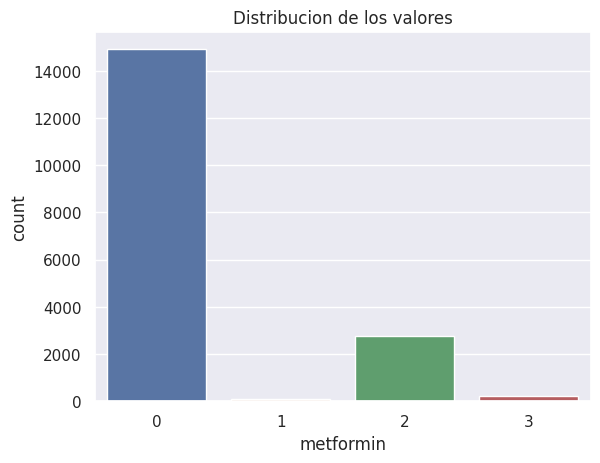

In [ ]:
# Realizamos un mapeo para todos los medicamentos
for col in columnas:
  df[col] = df[col].replace({'No':0,'Down':1,'Steady':2,'Up':3})
distribucion('metformin')

No    61.77%
Ch    38.23%
Name: change, dtype: object


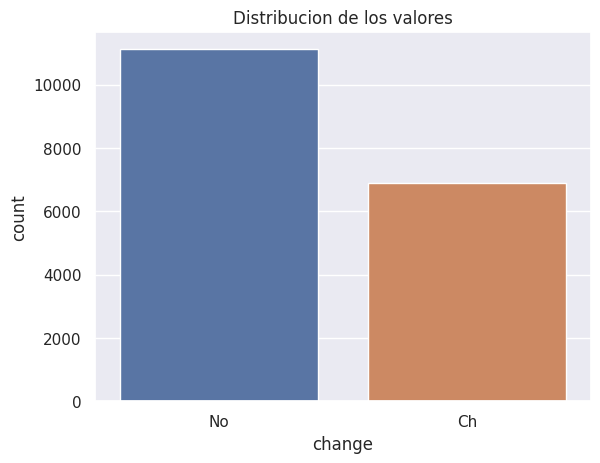

In [ ]:
# Analisis change
distribucion('change')

In [ ]:
# Realizamos un mapeo para change:
df.change = df.change.replace({'No':0,'Ch':1})

Yes    73.32%
No     26.68%
Name: diabetesmed, dtype: object


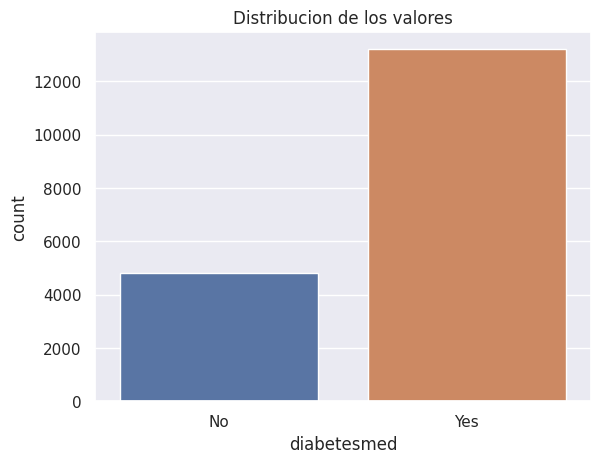

In [ ]:
# Analisis de diabetesmed: Indica si el paciente recibe medicamentos para la diabetes durante su estancia en el hospital.
distribucion('diabetesmed')

In [ ]:
# Realizamos el mapeo correspondiente:
df.diabetesmed = df.diabetesmed.replace({'No':0,'Yes':1})

In [ ]:
# En este punto ya se realizo una exploracion de todas las columnas en el dataset
# antes de pasar a la siguiente etapa definimos quitar las dos primeras columnas
# por que consideramos que no son relevantes para la prediccion del target.
df = df.drop(['encounter_id','patient_nbr'], axis = 1)

In [ ]:
# Quedando el dataset como sigue:
#data[col] = data[col].astype(np.int64)
df.head(10)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted
0,Caucasian,Female,5,9,1,0,1,41,0,1,0,0,0,4.0,4.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,15,1,0,2,3,59,0,18,0,0,0,0.0,4.0,0.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0
2,AfricanAmerican,Female,25,1,0,2,2,11,5,13,2,0,1,0.0,4.0,0.0,6,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,35,1,0,2,2,44,1,16,0,0,0,0.0,4.0,1.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0
4,Caucasian,Male,45,1,0,2,1,51,0,8,0,0,0,8.0,8.0,4.0,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0
5,Caucasian,Male,55,1,0,0,3,31,6,16,0,0,0,1.0,1.0,4.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0
6,Caucasian,Male,65,3,0,0,4,70,1,21,0,0,0,1.0,1.0,0.0,7,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0
7,Caucasian,Male,75,1,0,2,5,73,0,12,0,0,0,1.0,2.0,4.0,8,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,Caucasian,Female,85,1,0,1,13,68,2,28,0,0,0,1.0,1.0,0.0,8,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0
9,Caucasian,Female,95,3,1,1,12,33,3,18,0,0,0,1.0,8.0,2.0,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0


<ipython-input-39-79d82de53e7f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


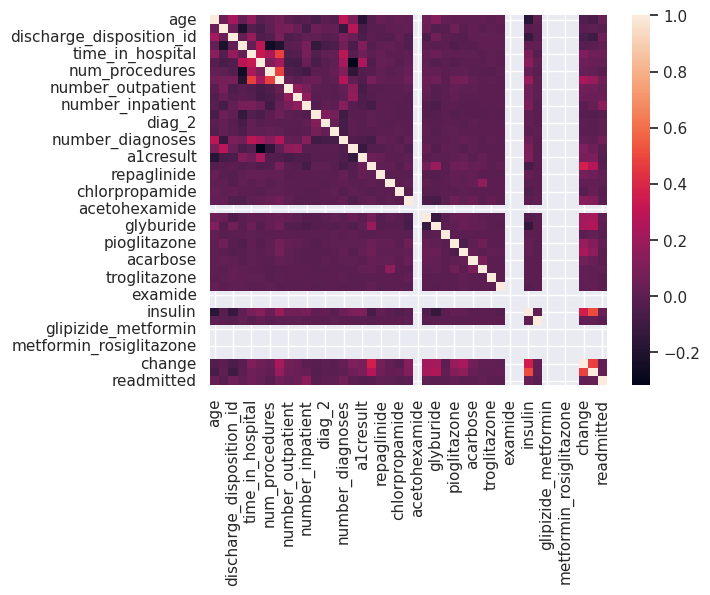

In [ ]:
# Correlacion de los datos:
sns.heatmap(df.corr())
plt.show()

In [ ]:
df.corr()['readmitted']

<ipython-input-40-c02469171da8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['readmitted']


age                         0.033672
admission_type_id          -0.013820
discharge_disposition_id    0.055192
admission_source_id         0.017285
time_in_hospital            0.055680
num_lab_procedures          0.025734
num_procedures             -0.012297
num_medications             0.048657
number_outpatient           0.024813
number_emergency            0.046600
number_inpatient            0.146328
diag_1                     -0.009069
diag_2                      0.011667
diag_3                      0.009201
number_diagnoses            0.066877
max_glu_serum              -0.006509
a1cresult                  -0.020790
metformin                  -0.018139
repaglinide                 0.016139
nateglinide                 0.003229
chlorpropamide             -0.008657
glimepiride                -0.007863
acetohexamide                    NaN
glipizide                   0.005641
glyburide                   0.001319
tolbutamide                -0.000965
pioglitazone                0.014615
r

In [ ]:
# Podemos quitar las columnas que tienen NaN como correlacion con readmitted
# puesto que son datos que no cambian y en nuestro criterio no serian determinantes
# a la hora de determinar el target.
# NO AFECTA EN NADA A LAS METRICAS
df = df.drop(['acetohexamide','examide','citoglipton','glipizide_metformin','glimepiride_pioglitazone','metformin_rosiglitazone','metformin_pioglitazone'], axis = 1)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,change,diabetesmed,readmitted
0,Caucasian,Female,5,9,1,0,1,41,0,1,0,0,0,4.0,4.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,15,1,0,2,3,59,0,18,0,0,0,0.0,4.0,0.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,1,0
2,AfricanAmerican,Female,25,1,0,2,2,11,5,13,2,0,1,0.0,4.0,0.0,6,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,35,1,0,2,2,44,1,16,0,0,0,0.0,4.0,1.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,1,0
4,Caucasian,Male,45,1,0,2,1,51,0,8,0,0,0,8.0,8.0,4.0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,1,1,0


In [ ]:
df.corr()['readmitted']

<ipython-input-42-c02469171da8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['readmitted']


age                         0.033672
admission_type_id          -0.013820
discharge_disposition_id    0.055192
admission_source_id         0.017285
time_in_hospital            0.055680
num_lab_procedures          0.025734
num_procedures             -0.012297
num_medications             0.048657
number_outpatient           0.024813
number_emergency            0.046600
number_inpatient            0.146328
diag_1                     -0.009069
diag_2                      0.011667
diag_3                      0.009201
number_diagnoses            0.066877
max_glu_serum              -0.006509
a1cresult                  -0.020790
metformin                  -0.018139
repaglinide                 0.016139
nateglinide                 0.003229
chlorpropamide             -0.008657
glimepiride                -0.007863
glipizide                   0.005641
glyburide                   0.001319
tolbutamide                -0.000965
pioglitazone                0.014615
rosiglitazone              -0.000351
a

In [ ]:
# Podemos remover algunos medicamentos para la diabetes que tienen una correlacion extremadamente baja
# de +- 0.000xxx con el target.
# MEJORA TODAS LAS METRICAS
df = df.drop(['tolbutamide','rosiglitazone','acarbose'], axis = 1)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,change,diabetesmed,readmitted
0,Caucasian,Female,5,9,1,0,1,41,0,1,0,0,0,4.0,4.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,15,1,0,2,3,59,0,18,0,0,0,0.0,4.0,0.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,1,0
2,AfricanAmerican,Female,25,1,0,2,2,11,5,13,2,0,1,0.0,4.0,0.0,6,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,35,1,0,2,2,44,1,16,0,0,0,0.0,4.0,1.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,1,0
4,Caucasian,Male,45,1,0,2,1,51,0,8,0,0,0,8.0,8.0,4.0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,1,1,0


In [ ]:
df.corr()['readmitted']

<ipython-input-44-c02469171da8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['readmitted']


age                         0.033672
admission_type_id          -0.013820
discharge_disposition_id    0.055192
admission_source_id         0.017285
time_in_hospital            0.055680
num_lab_procedures          0.025734
num_procedures             -0.012297
num_medications             0.048657
number_outpatient           0.024813
number_emergency            0.046600
number_inpatient            0.146328
diag_1                     -0.009069
diag_2                      0.011667
diag_3                      0.009201
number_diagnoses            0.066877
max_glu_serum              -0.006509
a1cresult                  -0.020790
metformin                  -0.018139
repaglinide                 0.016139
nateglinide                 0.003229
chlorpropamide             -0.008657
glimepiride                -0.007863
glipizide                   0.005641
glyburide                   0.001319
pioglitazone                0.014615
miglitol                    0.012890
troglitazone               -0.004607
t

In [ ]:
# Podemos remover algunas columnas mas que tienen una correlacion extremadamente baja
# de 0.00xxxx con el target.
# SE GANA EN ALGUNAS METRICAS Y SE PIERDE EN OTRAS
df = df.drop(['race','gender','diag_1','diag_3','max_glu_serum','nateglinide','chlorpropamide','glimepiride','glipizide','glyburide','troglitazone','tolazamide','glyburide_metformin'], axis = 1)
df.head()

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_2,number_diagnoses,a1cresult,metformin,repaglinide,pioglitazone,miglitol,insulin,change,diabetesmed,readmitted
0,5,9,1,0,1,41,0,1,0,0,0,4.0,1,0,0,0,0,0,0,0,0,0
1,15,1,0,2,3,59,0,18,0,0,0,4.0,9,0,0,0,0,0,3,1,1,0
2,25,1,0,2,2,11,5,13,2,0,1,4.0,6,0,0,0,0,0,0,0,1,0
3,35,1,0,2,2,44,1,16,0,0,0,4.0,7,0,0,0,0,0,3,1,1,0
4,45,1,0,2,1,51,0,8,0,0,0,8.0,5,0,0,0,0,0,2,1,1,0


DIVISION DE DATOS

In [ ]:
# Importamos las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
# Dividimos el dataset en dos:
x = df.drop(['readmitted'], axis = 1)
y = df['readmitted']
x_predict = x.tail(20)
y_predict = y.tail(20)
x = x.drop(index=x.tail(20).index)
y = y.drop(index=y.tail(20).index)

In [ ]:
# Separamos los datos para entrenamiento y pruebas
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)

REGRESION LINEAL

In [ ]:
# Importamos la libreria
from sklearn.linear_model import LinearRegression

In [ ]:
from scipy.optimize import linprog_verbose_callback
# Creamos y entrenamos el modelo
lineal = LinearRegression()

lineal.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Realizamos predicciones
y_pred = lineal.predict(x_test)

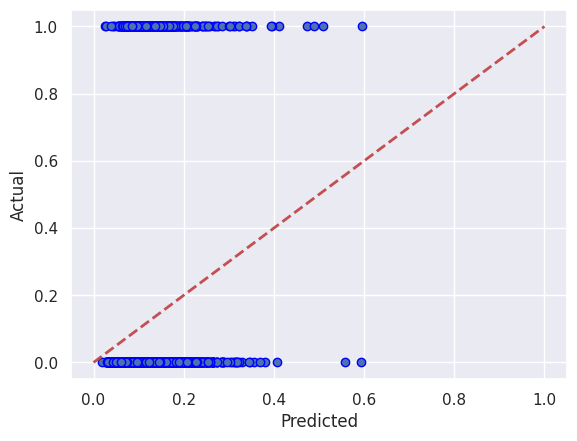

In [ ]:
# Mostrarmos el grafico
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Dado que determinamos que el problema corresponde al area de clasificadores y que la variable objetivo tiene un problema de desequilibrio, usaremos los datos originales y tambien los generados por la técnica SMOTE para resolverlo y poder hacer una comparacion con los resultados del dataset desbalanceado.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Tamaño original del dataset {}'.format(Counter(y)))
sm = SMOTE(random_state=20)

# Obtenemos los features y el target desde SMOTE
X, Y = sm.fit_resample(x, y)
print('Nuevo tamaño del dataset {}'.format(Counter(Y)))

Tamaño original del dataset Counter({0: 15966, 1: 2033})
Nuevo tamaño del dataset Counter({0: 15966, 1: 15966})


In [ ]:
# Dividimos el dataset de SOMOTE en dos:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 1)

REGRESION LOGISTICA

Dataset original

In [ ]:
# Creamos el clasificador y lo entrenamos
logistica = LogisticRegression()
logistica.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Realizamos las predicciones
y_pred = logistica.predict(x_test)

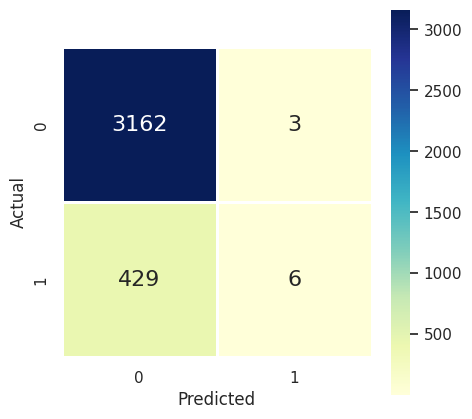


Positivos verdaderos(TP) =  6
Negativos verdaderos(TN) =  3162
Falsos positivos(FP) =  3
Falsos negativos(FN) =  429


In [ ]:
# Metrica matriz de confusion
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

print('\nPositivos verdaderos(TP) = ', cm[1,1])
print('Negativos verdaderos(TN) = ', cm[0,0])
print('Falsos positivos(FP) = ', cm[0,1])
print('Falsos negativos(FN) = ', cm[1,0])   

In [ ]:
# Metrica accuracy
accuracy = metrics.accuracy_score(y_test,y_pred)
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 88.000%


In [ ]:
# Metrica precision
precision = metrics.precision_score(y_test, y_pred)
print("Precision : %s" % "{0:.3%}".format(precision))

Precision : 66.667%


In [ ]:
# Metrica recall
recall = metrics.recall_score(y_test, y_pred)
print("Recall : %s" % "{0:.3%}".format(recall))

Recall : 1.379%


In [ ]:
# Metrica f1
f1 = metrics.f1_score(y_test, y_pred)
print("F1 : %s" % "{0:.3%}".format(f1))

F1 : 2.703%


In [ ]:
# Metrica Área bajo la curva ROC (AUC-ROC):
roc = metrics.roc_auc_score(y_test, y_pred)
print("Roc-Auc : %s" % "{0:.3%}".format(roc))

Roc-Auc : 50.642%


Smote

In [ ]:
# Creamos y entrenamos el modelo
logisticaS = LogisticRegression()

logisticaS.fit(X_train, Y_train)

# Realizamos las predicciones
Y_pred = logisticaS.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Definimos una funcion para mostrar todas las metricas

def metricas(test, pred):

  # Metrica matriz de confusion
  cm = metrics.confusion_matrix(test, pred, labels=[0, 1])
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

  plt.show()

  print('\nPositivos verdaderos(TP) = ', cm[1,1])
  print('Negativos verdaderos(TN) = ', cm[0,0])
  print('Falsos positivos(FP) = ', cm[0,1])
  print('Falsos negativos(FN) = ', cm[1,0])    

  # Metrica accuracy
  accuracy = metrics.accuracy_score(test,pred)
  print("\nAccuracy : %s" % "{0:.3%}".format(accuracy))

  # Metrica precision
  precision = metrics.precision_score(test, pred)
  print("Precision : %s" % "{0:.3%}".format(precision))

  # Metrica recall
  recall = metrics.recall_score(test, pred)
  print("Recall : %s" % "{0:.3%}".format(recall))

  # Metrica f1
  f1 = metrics.f1_score(test, pred)
  print("F1 : %s" % "{0:.3%}".format(f1))

  # Metrica Área bajo la curva ROC (AUC-ROC):
  roc = metrics.roc_auc_score(test, pred)
  print("Roc-Auc : %s" % "{0:.3%}".format(roc)) 

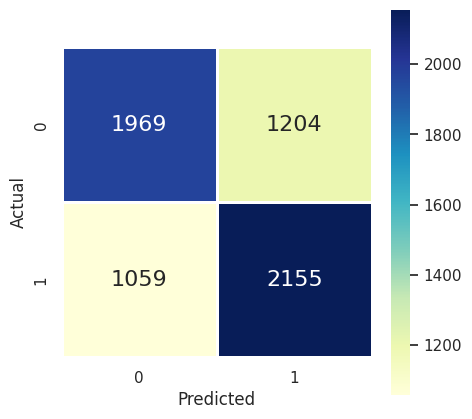


Positivos verdaderos(TP) =  2155
Negativos verdaderos(TN) =  1969
Falsos positivos(FP) =  1204
Falsos negativos(FN) =  1059

Accuracy : 64.569%
Precision : 64.156%
Recall : 67.050%
F1 : 65.571%
Roc-Auc : 64.553%


In [ ]:
# Mostramos las metricas logisticas con SMOTE
metricas(Y_test, Y_pred)

SVM (Support Vector Machine)

Original

In [ ]:
# Importamos las librerias para el svm
from sklearn import svm

In [ ]:
# Creamos el modelo
clasificadorSVM = svm.SVC()

In [ ]:
# Entrenar el modelo de clasificacion SVM
clasificadorSVM.fit(x_train, y_train)

SVC()

In [ ]:
# Realizamos las predicciones para las metricas
y_pred = clasificadorSVM.predict(x_test)

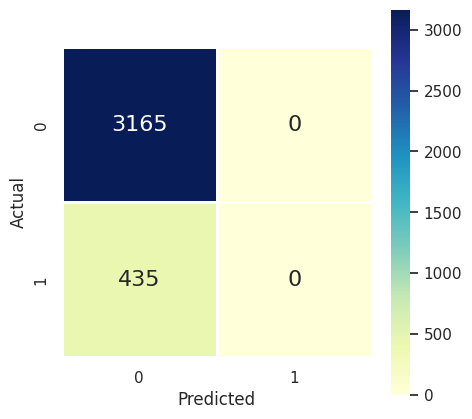


Positivos verdaderos(TP) =  0
Negativos verdaderos(TN) =  3165
Falsos positivos(FP) =  0
Falsos negativos(FN) =  435

Accuracy : 87.917%
Precision : 0.000%
Recall : 0.000%
F1 : 0.000%
Roc-Auc : 50.000%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Mostramos las metricas 
metricas(y_test, y_pred)

Smote

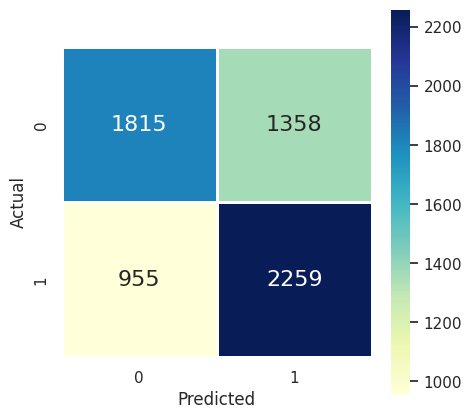


Positivos verdaderos(TP) =  2259
Negativos verdaderos(TN) =  1815
Falsos positivos(FP) =  1358
Falsos negativos(FN) =  955

Accuracy : 63.786%
Precision : 62.455%
Recall : 70.286%
F1 : 66.140%
Roc-Auc : 63.744%


In [ ]:
# Creamos el modelo
clasificadorSVM_S = svm.SVC()

# Entrenar el modelo de clasificacion SVM
clasificadorSVM_S.fit(X_train, Y_train)

# Realizamos las predicciones para las metricas
Y_pred = clasificadorSVM_S.predict(X_test)

# Mostramos las metricas 
metricas(Y_test, Y_pred)

ARBOL DE CLASIFICACION

Dataset Original

In [ ]:
# Importamos la libreria para hace uso de un arbol de clasificacion
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
# Creamos el modelo
arbol = DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
# Entrenamos el modelo
arbol.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

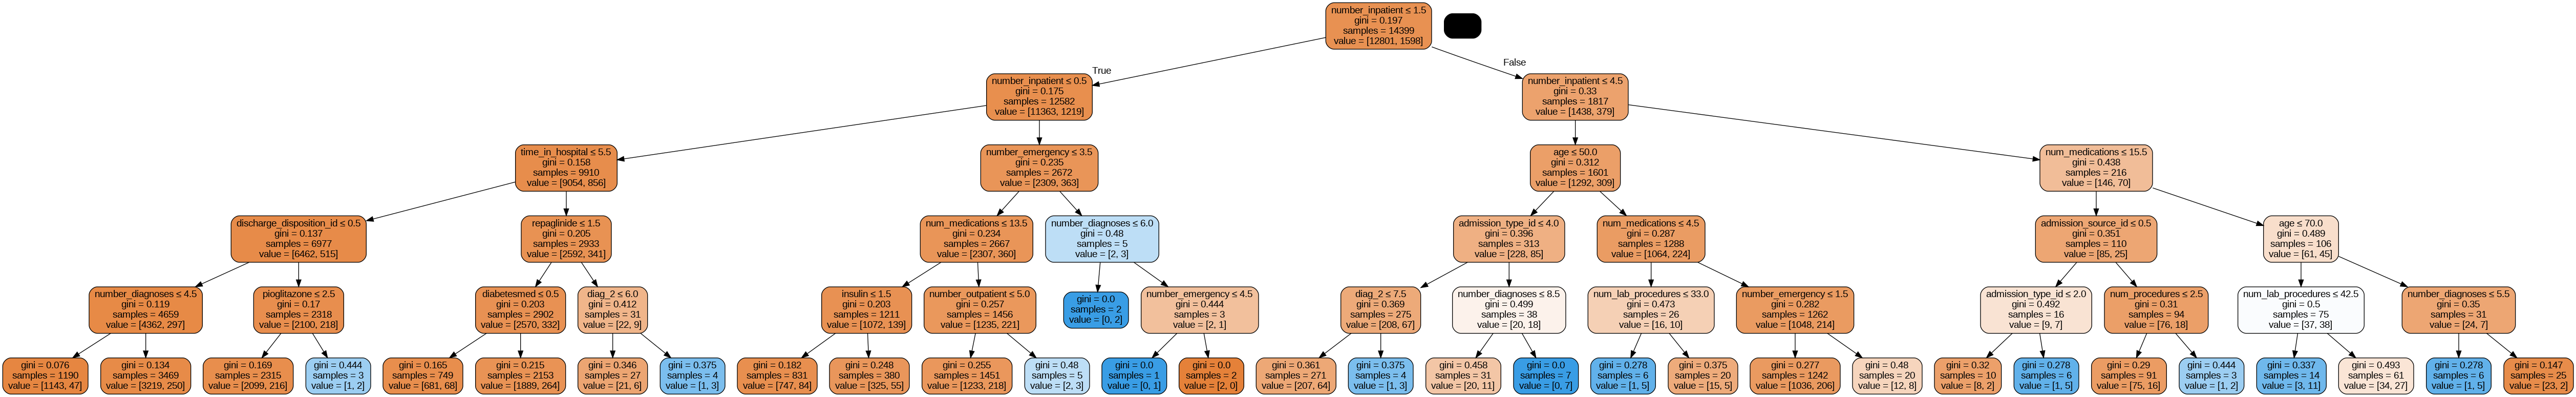

In [ ]:
# Visualizar el árbol usando graphviz
atributos = x.columns
dot_data = export_graphviz(arbol, out_file=None,  
                feature_names=atributos,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# Calcular la importancia de los atributos
pd.DataFrame({'Atributo':atributos, 'importancia':arbol.feature_importances_}).sort_values('importancia', ascending=False).head()

,Atributo,importancia
10,number_inpatient,0.435454
12,number_diagnoses,0.101744
7,num_medications,0.064532
0,age,0.063725
4,time_in_hospital,0.057393


In [ ]:
# Realizamos las prediccion
y_pred = arbol.predict(x_test)

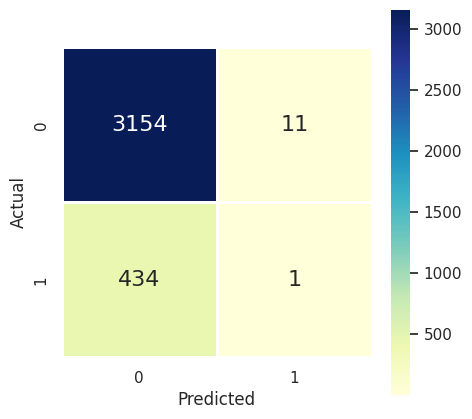


Positivos verdaderos(TP) =  1
Negativos verdaderos(TN) =  3154
Falsos positivos(FP) =  11
Falsos negativos(FN) =  434

Accuracy : 87.639%
Precision : 8.333%
Recall : 0.230%
F1 : 0.447%
Roc-Auc : 49.941%


In [ ]:
# Mostramos las metricas para el arbol
metricas(y_test, y_pred)

SMOTE

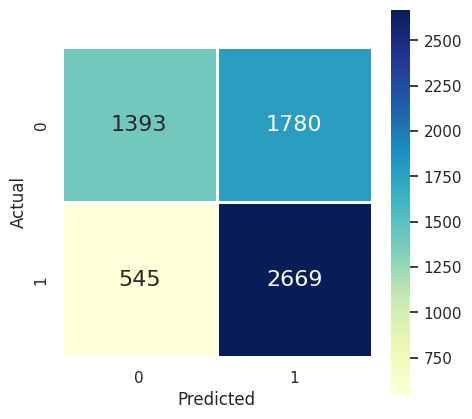


Positivos verdaderos(TP) =  2669
Negativos verdaderos(TN) =  1393
Falsos positivos(FP) =  1780
Falsos negativos(FN) =  545

Accuracy : 63.598%
Precision : 59.991%
Recall : 83.043%
F1 : 69.659%
Roc-Auc : 63.472%


In [ ]:
# Creamos el modelo
arbolS = DecisionTreeClassifier(max_depth=5, random_state=1)

# Entrenamos el modelo
arbolS.fit(X_train, Y_train)

# Realizamos las predicciones
Y_pred = arbolS.predict(X_test)

#Mostramos las metricas
metricas(Y_test, Y_pred)

**PRUEBA DE MODELOS**

**DATOS ESPERADOS**

**Según el DATASET estos son los valores**

x_expected

In [ ]:
y_expected

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**DATOS PREDECIDOS CON EL MODELO DE REGRESIÓN LOGISTICA**

Regresión logistica 

In [ ]:
y_predicted = logistica.predict(x_predict)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Regresión Logistica con SMOTE

In [ ]:
y_predicted = logisticaS.predict(x_predict)
y_predicted

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

Predicción con SVM 

In [ ]:
y_predicted = clasificadorSVM.predict(x_predict)
y_predicted 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Predicción SVM Smote

In [ ]:
y_predicted = clasificadorSVM_S.predict(x_predict)
y_predicted 

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

Predicción con Arbol de Decisión

In [ ]:
y_predicted = arbol.predict(x_predict)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])